# Introduction

This data task is from a Company. There are two exercises in this data task. The first exercise, looks into randomizing a large dataframe (50,000 rows and 8 columns). Each cell would contain one of three variables: "a", "b", and "c". Each row will then be sorted into groups. Where one unique row would be in group size 1, two rows that are the same would be in group size 2, etc. These group sizes are then analysed to see how frequently they appear (no. of groups). Analyses are carried out and a graph is plotted to investigate the distribution of group sizes. 

The second task, aims at intvestigating how to handle UK population by postcode data following GDPR within the UK. The dataset given had some postcodes which were not consistent, these postcodes were cleaned. In an attempt to anonymize the data, postcodes were grouped into their outward codes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import random

### Question 1a)

Randomly generate a dataframe with 8 columns and 50,000 rows. Each column should be a categorical variable (e.g. col_1, col_2, col_3... col_8) with three levels (e.g. a, b, c) in approximately equal proportions.

### Code and Test

In [2]:
#use a generator to generate random values
#I have named the three levels "a","b", and "c"
#with 50000 rows and 8 columns, with the probability of a,b,c appearing equally
#dataframe was created

rng = np.random.seed(42) 
levels = ["a","b","c"]
arr = rng.choice(levels, (50000,8), p=[1/3,1/3,1/3]) 
df = pd.DataFrame(arr, columns = ["col_1","col_2","col_3","col_4","col_5","col_6","col_7","col_8"])
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
0,a,c,a,c,b,a,c,c
1,a,b,b,a,b,a,b,a
2,a,c,b,a,a,c,c,c
3,a,a,a,c,b,b,b,c
4,a,c,a,b,c,c,a,b
...,...,...,...,...,...,...,...,...
49995,b,a,b,c,b,c,a,c
49996,a,b,a,c,c,b,b,b
49997,c,b,b,b,c,a,b,a
49998,b,a,c,a,a,b,a,a


### Question 1b)

Verify that the proportions of each value are similar for each of the eight columns.

### Code and Test

In [3]:
#find the proportion of a,b, and c in column 1 through 8.

def proportion_abc():
    for col in df:
        print(df[col].value_counts()/df.shape[0])

print(proportion_abc())

#yes, this determines that values a,b, and c have similar proportions. 

a    0.33452
b    0.33400
c    0.33148
Name: col_1, dtype: float64
c    0.33556
a    0.33226
b    0.33218
Name: col_2, dtype: float64
b    0.33398
a    0.33318
c    0.33284
Name: col_3, dtype: float64
b    0.33484
c    0.33266
a    0.33250
Name: col_4, dtype: float64
a    0.33478
b    0.33342
c    0.33180
Name: col_5, dtype: float64
a    0.33414
b    0.33328
c    0.33258
Name: col_6, dtype: float64
b    0.33384
a    0.33372
c    0.33244
Name: col_7, dtype: float64
a    0.33414
c    0.33406
b    0.33180
Name: col_8, dtype: float64
None


### Question 1c)

How many unique rows (i.e., permutations of category levels) are possible?

### Code and Test

In [4]:
#find the unique rows, therefore, drop duplicates. 

drop_dup = df.drop_duplicates()
drop_dup.shape

#there are 6557 unique rows. 

(6557, 8)

### Question 1d)

Produce a dataframe and graph which show the frequencies (numbers of groups) by permutation group sizes. 

### Code

In [5]:
# find how many rows are the same and find their frequencies

df_freq = df.groupby(["col_1","col_2","col_3","col_4","col_5","col_6","col_7","col_8"]).size().reset_index(name='count')
df_freq

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,count
0,a,a,a,a,a,a,a,a,9
1,a,a,a,a,a,a,a,b,10
2,a,a,a,a,a,a,a,c,5
3,a,a,a,a,a,a,b,a,6
4,a,a,a,a,a,a,b,b,7
...,...,...,...,...,...,...,...,...,...
6552,c,c,c,c,c,c,b,b,9
6553,c,c,c,c,c,c,b,c,9
6554,c,c,c,c,c,c,c,a,10
6555,c,c,c,c,c,c,c,b,6


In [6]:
#the count column determines the group size. Find the maximum and minimum group sizes. 

df_freq["count"].max(), df_freq["count"].min()

(19, 1)

In [7]:
#find the frequency of each group size. 

df_table = df_freq.groupby("count").count()
df_table.drop(columns = ["col_2","col_3","col_4","col_5","col_6","col_7","col_8"], inplace = True)

In [8]:
#rename count to group_size and col_1 to num_groups

df_table = df_table.reset_index()
df_table.rename(columns = {"count":"group_size","col_1":"num_groups"}, inplace = True)

In [9]:
df_table

,group_size,num_groups
0,1,18
1,2,90
2,3,235
3,4,439
4,5,707
5,6,901
6,7,953
7,8,882
8,9,772
9,10,572


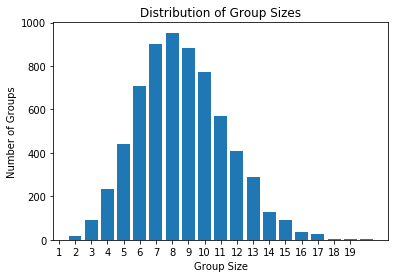

In [10]:
#create a graph to show the group size vs number of groups. 

x = df_table["group_size"]
y = df_table["num_groups"]
ind = np.arange(len(x))
plt.bar(x,y)

plt.title("Distribution of Group Sizes")
plt.xlabel('Group Size')
plt.ylabel('Number of Groups')
plt.xticks(ind, x)
plt.show();


### Question 1e)
Comment upon the distribution of group sizes in d)

The distribution in d) shows that there is a peak where group size = 7. Therefore, out of 50,000 trials, the most common group size was 7 and it occured 984 times. The further away the group size is away from the peak, the less frequent it occurs. This distribution is commonly seen in probability distributions for fair die throws. 

### Question 1f)

If your random variables were, in fact, meaningful information on individuals, which group sizes are of most concern from a privacy perspective?

In [49]:
7*953 #how many enteries does group 7 have?

6671

The group sizes that are of most concern from a privacy perspective are group sizes that have the most unique variables such as group size 1. As they would be easier to identify. For example, 18 individuals in group size 1 could have their identifications revealed.

Group 7 would be harder to identify because it is the most frequent and their variables are less unique. This means that if group 7 occurs 953 times, then the person targeting this group would have to sift through 6671 data enteries and it'll be harder to identify an individual in that specific group. 

### Question 1g)

Consider the effect of missing data in the dataset you created in Part a). How might this complicate the production of a frequency table of group sizes in Part d)?

If there was missing data within the dataset, it would mean that variables a, b, and c do not have equal proportions. Therefore, some patterns would be missing in the dataframe and the frequency of the group sizes would be skewed. This would have a significant effect on our insights drawn from the dataset. This also may mean that specific groups are more vulnerable than others, but with missing data, it would be difficult to determine. 

### Question 1h)

Imagine the code that you wrote for Part d) was to be deployed in an automated system that Mirador’s customers could use independently, on potentially large volumes of data.
Describe how you might deploy the code, and what additional considerations you might have or any changes to the code you might make. Note: it is not necessary to provide another version of the code used for 1 d).

After cleaning the code, I would convert the dataframe as a common datafile as a csv. The csv file is good because it can be easily exported and imported into other programs that Mirador's customers would use. It is human readable and can be easily viewed with a text editor like Excel, and it is commonly used to organise large amounts of data. For transferring large amounts of data, it would be best to allow the consumers to split up the data through the service endpoint. To deploy the code, I would write a simple web service which runs the code and exposes it through http handlers. I would then run this service on a server via a cloud provider such as AWS. This would allow the consumers to specify the data range what they want and download the data in a more sustainable way.  

### Question 2.

What is the best method to use to anonymize UK population postcode data following the UK's GDPR?

### Gathering Data
Data is gathered by downloading the csv file and reading the dataframe in Jupyter Notebook. 

In [13]:
df_UK =  pd.read_csv(r"C:\Users\Chloe\Desktop\Job Hunting\Mirador Analytics\Postcode_Estimates_Table_1.csv")
df_UK

,Postcode,Total,Males,Females,Occupied_Households
0,AL1 1AG,14,6,8,6
1,AL1 1AJ,124,60,64,51
2,AL1 1AR,32,17,15,17
3,AL1 1AS,34,17,17,13
4,AL1 1BH,52,15,37,41
...,...,...,...,...,...
1308775,YO8 9YA,23,14,9,8
1308776,YO8 9YB,33,17,16,13
1308777,YO8 9YD,9,4,5,4
1308778,YO8 9YE,13,6,7,3


### Assess the Data

In [14]:
#find out how many postcodes there are in the dataframe by looking at the number of rows. 

df_UK.shape

(1308780, 5)

In [15]:
#see if there is any missing data entries by using .info()

df_UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308780 entries, 0 to 1308779
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Postcode             1308780 non-null  object
 1   Total                1308780 non-null  int64 
 2   Males                1308780 non-null  int64 
 3   Females              1308780 non-null  int64 
 4   Occupied_Households  1308780 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 49.9+ MB


In [16]:
#look at the summary statistics in the dataframe. 

df_UK.describe()

,Total,Males,Females,Occupied_Households
count,1.308780e+06,1.308780e+06,1.308780e+06,1.308780e+06
mean,4.284594e+01,2.106800e+01,2.177794e+01,1.785330e+01
std,3.881508e+01,2.022517e+01,1.973323e+01,1.484332e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,7.000000e+00,7.000000e+00,6.000000e+00
50%,3.300000e+01,1.600000e+01,1.600000e+01,1.400000e+01
75%,6.100000e+01,3.000000e+01,3.100000e+01,2.600000e+01
max,3.215000e+03,1.522000e+03,1.733000e+03,6.460000e+02


In [17]:
#see if there are any duplicates rows in the dataframe. 

df_UK.duplicated().sum()

0

In [18]:
#check that the postcodes are all unique. 

df_UK["Postcode"].value_counts().sum()

1308780

In [19]:
#have a quick investigation on where various postcodes are and what postcode format they are written in. 

df_UK.sample(10)

,Postcode,Total,Males,Females,Occupied_Households
1217623,W11 4BN,20,8,12,10
772330,NR2 3TT,111,59,52,49
1285439,WV107EG,13,7,6,6
419379,GU104PW,30,16,14,12
31447,B72 1DW,81,39,42,28
850764,PL2 3QJ,127,66,61,49
299928,DH2 1QX,6,2,4,2
644300,M7 2LE,14,6,8,5
212459,CM2 8JY,3,1,2,1
1284989,WV1 4RE,46,33,13,42


In [20]:
#check the total number of residents in the dataframe. 

df_UK["Total"].sum()

56075912

In [21]:
#subtract the population of the UK shown on Google with the number of residents in the dataframe. 

66650000-56075912

10574088

In [51]:
#check if any males could be identified living in a postcode

df_UK.query('Males == "1"')

,Postcode,Total,Males,Females,Occupied_Households
17,AL1 1EB,4,1,3,1
21,AL1 1EZ,1,1,0,0
23,AL1 1HB,3,1,2,2
36,AL1 1JG,1,1,0,1
64,AL1 1NQ,1,1,0,1
...,...,...,...,...,...
1308574,YO8 9EL,4,1,3,2
1308625,YO8 9HX,3,1,2,1
1308651,YO8 9LG,1,1,0,1
1308656,YO8 9LP,3,1,2,1


In [52]:
#check if any females could be identified living in a postcode

df_UK.query('Females == "1"')

,Postcode,Total,Males,Females,Occupied_Households
25,AL1 1HH,4,3,1,2
50,AL1 1LE,6,5,1,2
72,AL1 1PJ,3,2,1,2
97,AL1 1RG,2,1,1,1
100,AL1 1RL,3,2,1,2
...,...,...,...,...,...
1308567,YO8 9EB,2,1,1,1
1308687,YO8 9PB,2,1,1,1
1308705,YO8 9PZ,1,0,1,1
1308744,YO8 9SD,1,0,1,1


### Clean

#### Quality

1) UK postcode consists of 5 to 7 alphanumeric characters. In this dataframe, some are joined and some postcodes are split. This would need to be corrected to keep it consistent. It would be preferred if the postcodes were in a standard UK format. 

In [22]:
#create a copy of the df_UK dataset as we would want to keep the original intact. 

df_UK_clean = df_UK.copy()

### Define

Remove all the spaces from the postcodes to keep it consistent. Then produce an appropriate format for postcodes with 5,6, and 7 characters. 

### Code

In [23]:
#remove the spaces from the postcodes.

df_UK_clean["Postcode"] = df_UK_clean.Postcode.str.replace(" ","")

In [24]:
df_UK_clean

,Postcode,Total,Males,Females,Occupied_Households
0,AL11AG,14,6,8,6
1,AL11AJ,124,60,64,51
2,AL11AR,32,17,15,17
3,AL11AS,34,17,17,13
4,AL11BH,52,15,37,41
...,...,...,...,...,...
1308775,YO89YA,23,14,9,8
1308776,YO89YB,33,17,16,13
1308777,YO89YD,9,4,5,4
1308778,YO89YE,13,6,7,3


In [25]:
#add a new postcode column, where 5 character postcodes have a format: "AA AAA", 
#6 character postcodes have a format of "AAA AAA"
#7 character postcodes have a format of "AAAA AAA"

postcode = []

def postcode_new(row):
    curr_postcode = str(row["Postcode"])
    if len(curr_postcode) == 5:
        p_split_5 = curr_postcode[:2] + " " + curr_postcode[2:]
        postcode.append(p_split_5)
    elif len(curr_postcode) == 6:
        p_split_6 = curr_postcode[:3] + " " + curr_postcode[3:]
        postcode.append(p_split_6)
    elif len(curr_postcode) == 7:
        p_split_7 = curr_postcode[:4] + " " + curr_postcode[4:]
        postcode.append(p_split_7)
df_UK_clean.apply(postcode_new, axis = 1)
df_UK_clean["postcode"] = postcode

### Test

In [26]:
df_UK_clean.drop(["Postcode"], axis = 1)

,Total,Males,Females,Occupied_Households,postcode
0,14,6,8,6,AL1 1AG
1,124,60,64,51,AL1 1AJ
2,32,17,15,17,AL1 1AR
3,34,17,17,13,AL1 1AS
4,52,15,37,41,AL1 1BH
...,...,...,...,...,...
1308775,23,14,9,8,YO8 9YA
1308776,33,17,16,13,YO8 9YB
1308777,9,4,5,4,YO8 9YD
1308778,13,6,7,3,YO8 9YE


In [28]:
df_UK_clean.query('postcode == "TW11 8TX"')

,Postcode,Total,Males,Females,Occupied_Households,postcode
1202739,TW118TX,125,70,55,61,TW11 8TX


### Define
Split the postcode into two codes, outward code and inward code. 

In [29]:
df_UK_clean["outward_code"], df_UK_clean["inward_code"] = df_UK_clean["postcode"].str.rsplit(" ",1).str

C:\Users\Chloe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [30]:
df_UK_clean

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
0,AL11AG,14,6,8,6,AL1 1AG,AL1,1AG
1,AL11AJ,124,60,64,51,AL1 1AJ,AL1,1AJ
2,AL11AR,32,17,15,17,AL1 1AR,AL1,1AR
3,AL11AS,34,17,17,13,AL1 1AS,AL1,1AS
4,AL11BH,52,15,37,41,AL1 1BH,AL1,1BH
...,...,...,...,...,...,...,...,...
1308775,YO89YA,23,14,9,8,YO8 9YA,YO8,9YA
1308776,YO89YB,33,17,16,13,YO8 9YB,YO8,9YB
1308777,YO89YD,9,4,5,4,YO8 9YD,YO8,9YD
1308778,YO89YE,13,6,7,3,YO8 9YE,YO8,9YE


### Define
Are all UK countries represented in the dataframe?

### Code

In [57]:
df_UK_clean.query('outward_code == "LL65"')
df_UK_clean.query('outward_code == "SA45"')
#has postcodes from Wales

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
975174,SA459NG,4,2,2,2,SA45 9NG,SA45,9NG
975175,SA459NH,9,4,5,5,SA45 9NH,SA45,9NH
975176,SA459NJ,20,9,11,13,SA45 9NJ,SA45,9NJ
975177,SA459NL,3,1,2,2,SA45 9NL,SA45,9NL
975178,SA459NN,1,0,1,1,SA45 9NN,SA45,9NN
...,...,...,...,...,...,...,...,...
975258,SA459TR,16,9,7,7,SA45 9TR,SA45,9TR
975259,SA459TS,3,1,2,1,SA45 9TS,SA45,9TS
975260,SA459TU,17,7,10,6,SA45 9TU,SA45,9TU
975261,SA459TX,9,5,4,4,SA45 9TX,SA45,9TX


In [58]:
df_UK_clean.query('outward_code == "BT71"')
df_UK_clean.query('outward_code == "BT80"')

#no postcode from Nothern Ireland

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code


In [60]:
df_UK_clean.query('outward_code == "G78"')
df_UK_clean.query('outward_code == "PA15"')
df_UK_clean.query('outward_code == "G34"')
df_UK_clean.query('outward_code == "EH12"')

#no postcode from Scotland

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code


In [61]:
df_UK_clean.query('outward_code == "AL1"')

#postcodes from England

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
0,AL11AG,14,6,8,6,AL1 1AG,AL1,1AG
1,AL11AJ,124,60,64,51,AL1 1AJ,AL1,1AJ
2,AL11AR,32,17,15,17,AL1 1AR,AL1,1AR
3,AL11AS,34,17,17,13,AL1 1AS,AL1,1AS
4,AL11BH,52,15,37,41,AL1 1BH,AL1,1BH
...,...,...,...,...,...,...,...,...
926,AL15UP,70,33,37,30,AL1 5UP,AL1,5UP
927,AL15UQ,8,4,4,4,AL1 5UQ,AL1,5UQ
928,AL15WA,78,35,43,42,AL1 5WA,AL1,5WA
929,AL15WB,63,34,29,34,AL1 5WB,AL1,5WB


### Define
Group together outward codes so it would be harder to determine where individuals lived. 

### Code

In [31]:
outward = df_UK_clean.groupby("outward_code").sum()
outward

,Total,Males,Females,Occupied_Households
outward_code,,,,
AL1,36291,18043,18248,15082
AL10,35391,18058,17333,12424
AL2,23335,11452,11883,9380
AL3,28025,13622,14403,11197
AL4,27221,13373,13848,10792
...,...,...,...,...
YO60,4583,2251,2332,2042
YO61,13914,6692,7222,5939
YO62,11979,6016,5963,5116


In [32]:
#have 2297 outward codes as opposed to 1308780 postcodes.

outward.shape

(2297, 4)

In [33]:

outward.sample(10)

,Total,Males,Females,Occupied_Households
outward_code,,,,
CM77,15475,7556,7919,5800
N3,26599,12897,13702,10476
BD14,8860,3958,4902,3388
CF71,8906,4383,4523,3787
LL14,33617,16600,17017,14355
M14,53136,26750,26386,17252
TA5,10266,5046,5220,4347
PR3,37542,18343,19199,15553
KT7,10284,4955,5329,4028


In [62]:
#see if individuals can still be identified

outward.Males.min(), outward.Females.min(), outward.Occupied_Households.min()

(1, 1, 1)

### Define

Although outward grouping has been carried out, there are still individuals that could be identified. Therefore, would need to look closer into these postcodes. 

### Code

In [35]:
out_male = outward["Males"] < 20
out_female = outward["Females"] < 20
small_pop = outward[out_male & out_female].reset_index()
small_pop

,outward_code,Total,Males,Females,Occupied_Households
0,B40,9,6,3,2
1,DG14,7,4,3,4
2,EC2N,5,4,1,4
3,EC2R,13,9,4,8
4,EC2V,24,17,7,15
5,EC3M,6,4,2,6
6,EC3V,16,9,7,10
7,EC4N,13,11,2,11
8,M17,17,8,9,7
9,N1C,7,3,4,3


In [36]:
df_UK_clean.query('outward_code == "DG14"')

#its a field. 

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
298761,DG140TF,7,4,3,4,DG14 0TF,DG14,0TF


In [37]:
df_UK_clean.query('outward_code == "EC2N"')
df_UK_clean.query('outward_code == "EC2R"')
df_UK_clean.query('outward_code == "EC2V"')


#commerical buildings

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
367255,EC2V5AA,3,2,1,1,EC2V 5AA,EC2V,5AA
367256,EC2V5DD,1,1,0,1,EC2V 5DD,EC2V,5DD
367257,EC2V6AG,1,1,0,1,EC2V 6AG,EC2V,6AG
367258,EC2V6AU,2,2,0,1,EC2V 6AU,EC2V,6AU
367259,EC2V6BN,5,2,3,2,EC2V 6BN,EC2V,6BN
367260,EC2V6HH,6,5,1,5,EC2V 6HH,EC2V,6HH
367261,EC2V7HR,3,2,1,1,EC2V 7HR,EC2V,7HR
367262,EC2V7PB,1,1,0,1,EC2V 7PB,EC2V,7PB
367263,EC2V8DP,1,0,1,1,EC2V 8DP,EC2V,8DP
367264,EC2V8EX,1,1,0,1,EC2V 8EX,EC2V,8EX


In [38]:
df_UK_clean.query('outward_code == "M17"')


,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
623694,M171DQ,1,0,1,1,M17 1DQ,M17,1DQ
623695,M171JS,1,1,0,1,M17 1JS,M17,1JS
623696,M171PZ,1,0,1,1,M17 1PZ,M17,1PZ
623697,M171SG,5,3,2,1,M17 1SG,M17,1SG
623698,M171SQ,3,2,1,1,M17 1SQ,M17,1SQ
623699,M178AP,3,1,2,1,M17 8AP,M17,8AP
623700,M178AR,1,0,1,1,M17 8AR,M17,8AR
623701,M178WW,2,1,1,0,M17 8WW,M17,8WW


In [39]:
df_UK_clean.query('outward_code == "B40"')

#B40 postcodes are car parks. 

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
20830,B401PS,4,3,1,1,B40 1PS,B40,1PS
20831,B401QA,5,3,2,1,B40 1QA,B40,1QA


In [40]:
df_UK_clean.query('outward_code == "N1C"')

#public places

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
680448,N1C4PL,2,0,2,1,N1C 4PL,N1C,4PL
680449,N1C4PW,5,3,2,2,N1C 4PW,N1C,4PW


In [41]:
df_UK_clean.query('outward_code == "TD5"')

#this is a farm

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
1141373,TD58BW,10,6,4,5,TD5 8BW,TD5,8BW


In [47]:
df_UK_clean.query('outward_code == "TW6"')

#fields, airport, carpark

,Postcode,Total,Males,Females,Occupied_Households,postcode,outward_code,inward_code
1209161,TW62AA,1,1,0,1,TW6 2AA,TW6,2AA
1209162,TW62AL,3,2,1,2,TW6 2AL,TW6,2AL
1209163,TW62AQ,1,1,0,0,TW6 2AQ,TW6,2AQ
1209164,TW62AU,2,2,0,1,TW6 2AU,TW6,2AU
1209165,TW62RX,4,2,2,1,TW6 2RX,TW6,2RX
1209166,TW63SY,5,3,2,2,TW6 3SY,TW6,3SY


C:\Users\Chloe\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


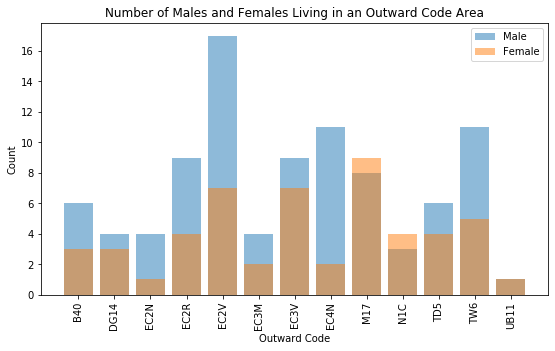

In [48]:
#Overlapping subplots to visualise how many males and females live in the each outward code. 

x_male = small_pop["outward_code"]
y_male = small_pop["Males"]


x_female = small_pop["outward_code"]
y_female = small_pop["Females"]


plt.rcParams['figure.figsize']=(20,5)
plt.subplot(1,2,1)
plt.bar(x_male, y_male, alpha = 0.5, label = "Male")
plt.title("Number of Males and Females Living in an Outward Code Area")
plt.xlabel("Outward Code")
plt.ylabel("Count")
ind = np.arange(len(x_male))
plt.xticks(ind, x_male, rotation = 90)

plt.subplot(1,2,1)
plt.bar(x_female, y_female, alpha = 0.5, label = "Female")
plt.legend(["Male","Female"])


plt.show();

### Store

In [64]:
df_UK_clean.to_csv(r"C:\Users\Chloe\Desktop\Job Hunting\Mirador Analytics\df_UK_clean.csv")
outward.to_csv(r"C:\Users\Chloe\Desktop\Job Hunting\Mirador Analytics\outward.csv")
small_pop.to_csv(r"C:\Users\Chloe\Desktop\Job Hunting\Mirador Analytics\small_pop.csv")